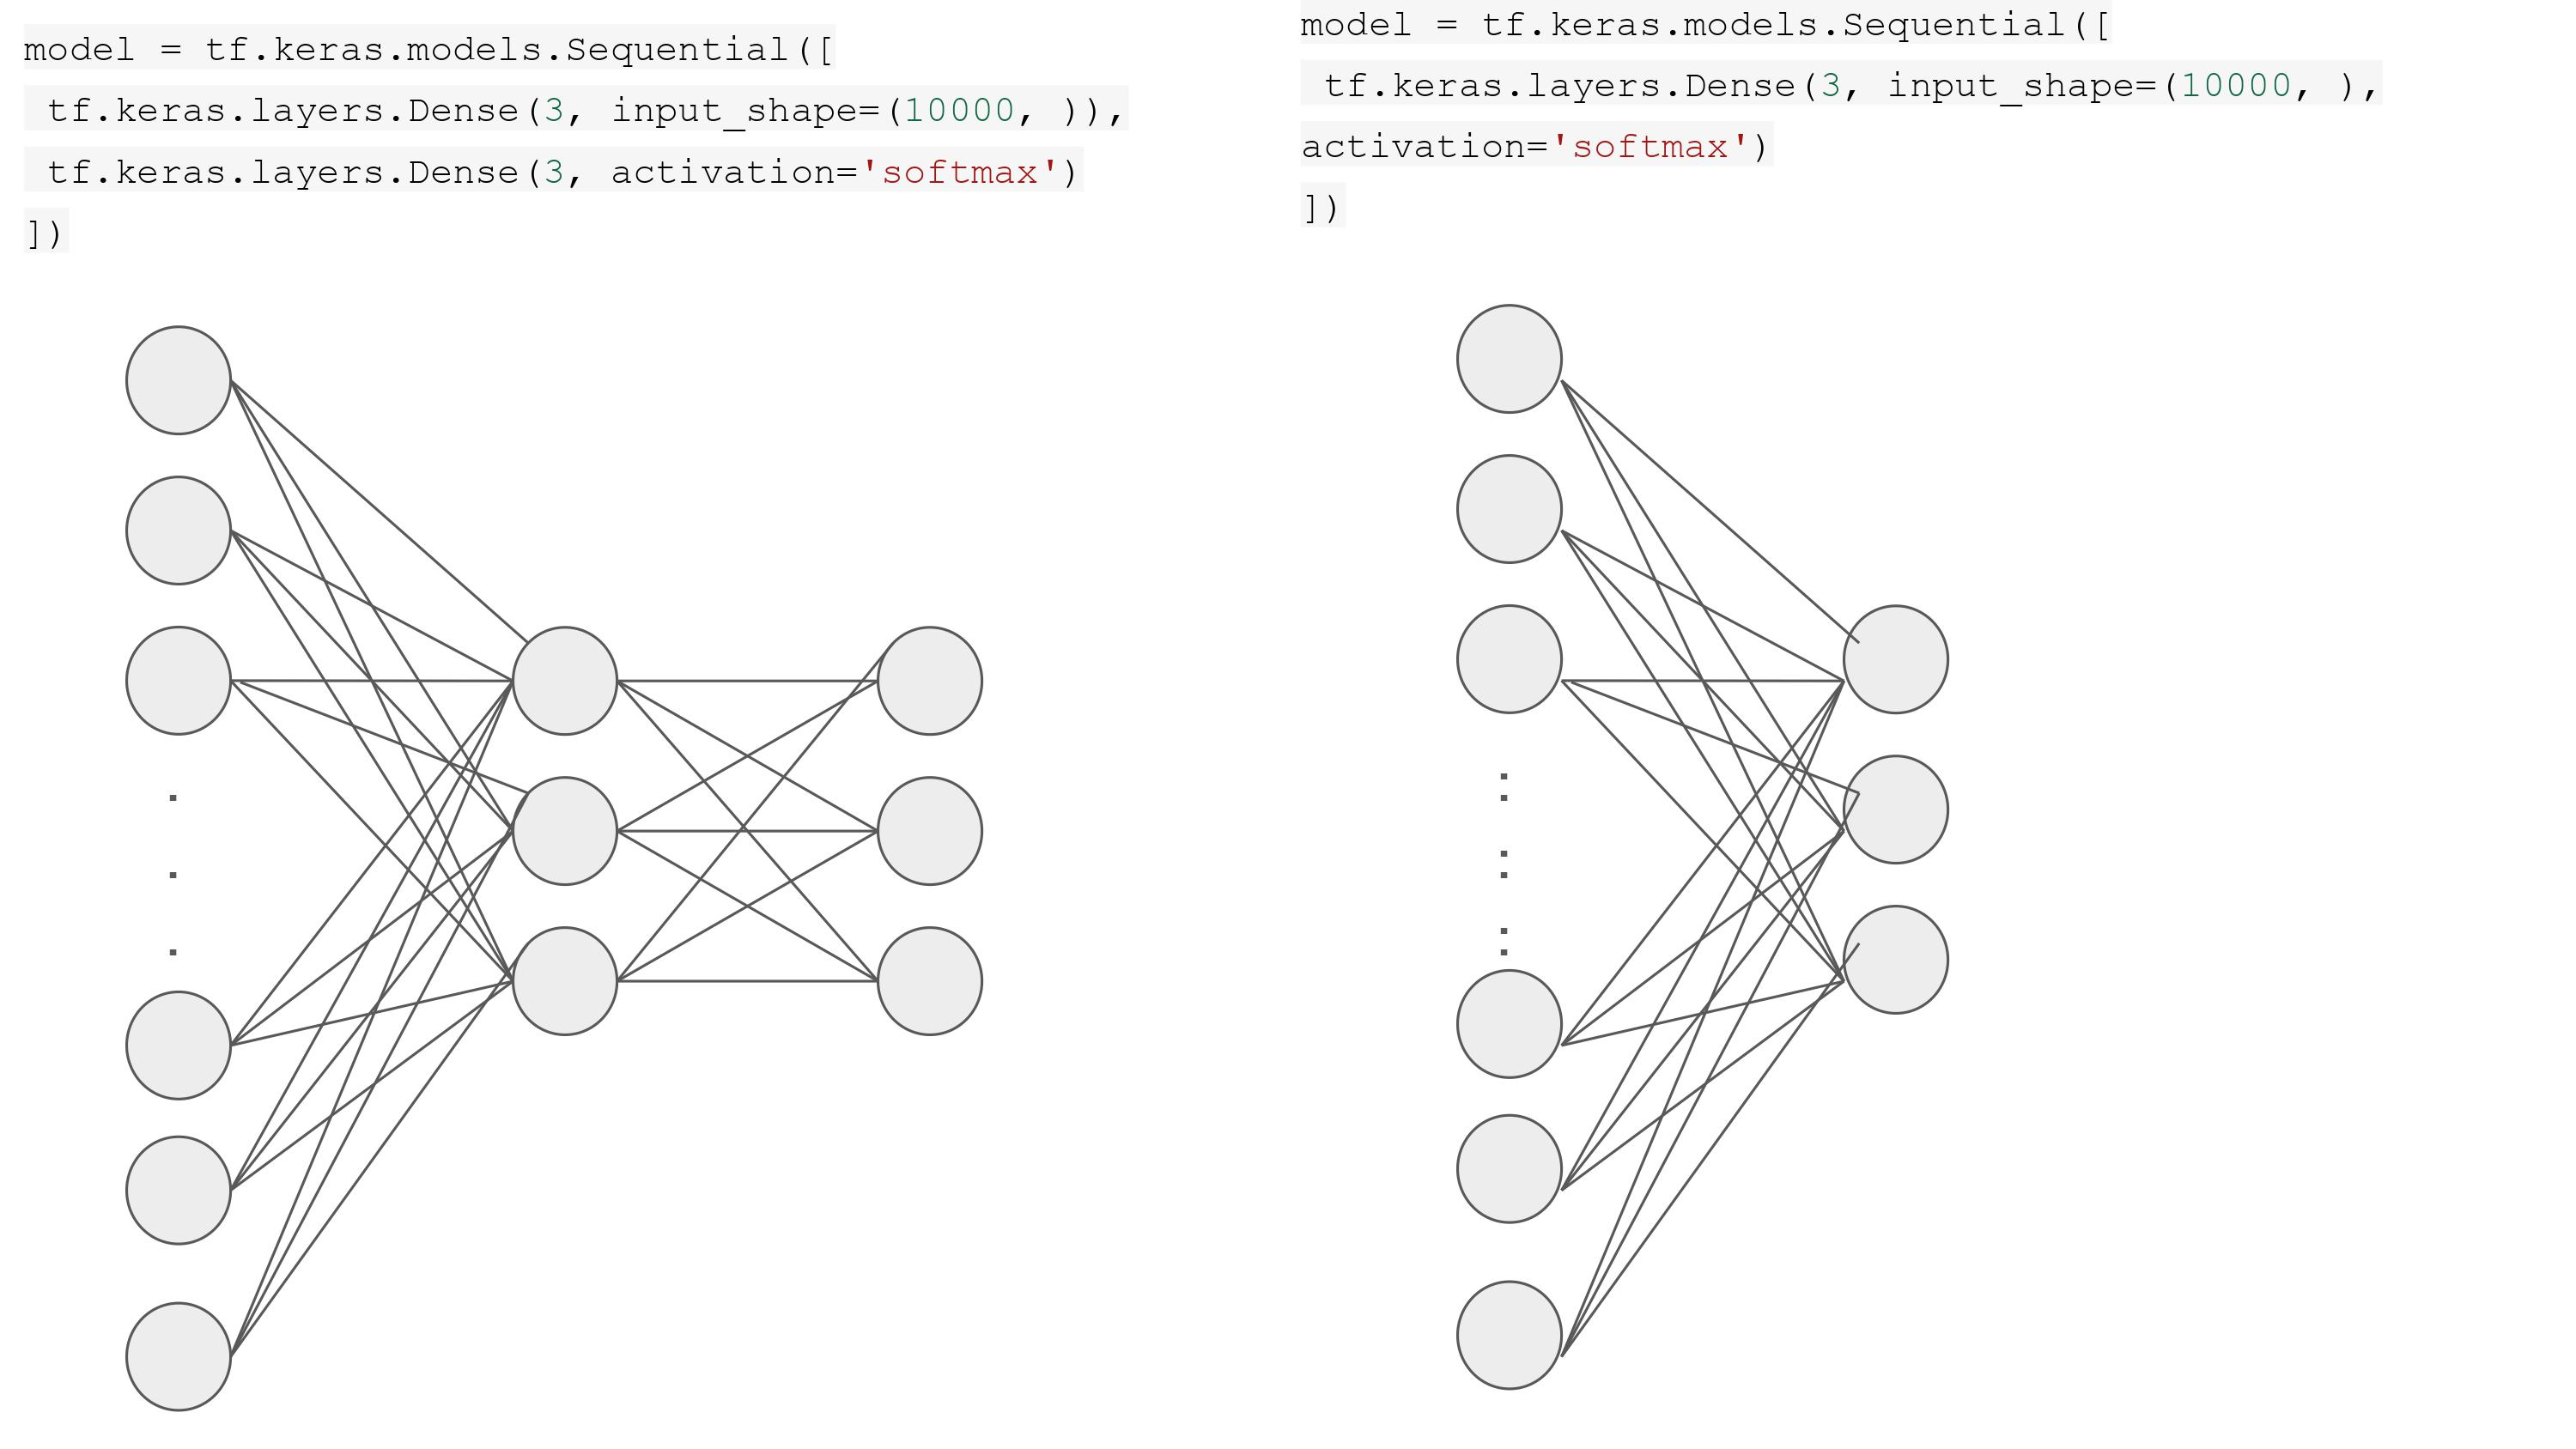

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [26]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from pyESN.pyESN import ESN

In [28]:
# mat = scipy.io.loadmat('case3_quantum.mat')
mat = scipy.io.loadmat('case3_D2_all_1000.mat')
# mat2 = scipy.io.loadmat('g2_a.mat')
# mat3 = scipy.io.loadmat('case3_extended_4000_m10_to_10.mat')


ns_test = []
size = 1000
for i in range(1000):
    ns_test.append(mat['ns_D2_16_1000'][0][i][0])
g2_test = mat['g2_a_D2_16_1000']

ns = []
for i in range(size):
    ns.append(mat['ns_D2_1_1000'][0][i][0])
for i in range(size):
    ns.append(mat['ns_D2_14_1000'][0][i][0])
for i in range(size):
    ns.append(mat['ns_D2_18_1000'][0][i][0])
    
g2 = []
for i in range(size):
    g2.append(mat['g2_a_D2_1_1000'][i])
for i in range(size):
    g2.append(mat['g2_a_D2_14_1000'][i])
for i in range(size):
    g2.append(mat['g2_a_D2_18_1000'][i])    
# ns3_extended = mat3['ns']
# nn_classic = mat3['n_a']
# ns3_extended = ns3_extended[1000:3000]
# g2_case3_extended = abs(mat3['g2_a'])
# g2_case3_extended = g2_case3_extended[1000:3000]
# Delta_extended = mat3['Delta1_vector'][0]
# Delta_extended = Delta_extended[1000:3000]

In [30]:
Deltas = mat['Delta1_vector']

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['g2_a_D2_1_1000'],label='$\Delta_{a} = 1$')
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['g2_a_D2_14_1000'],label='$\Delta_{a} = 1.4$')
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['

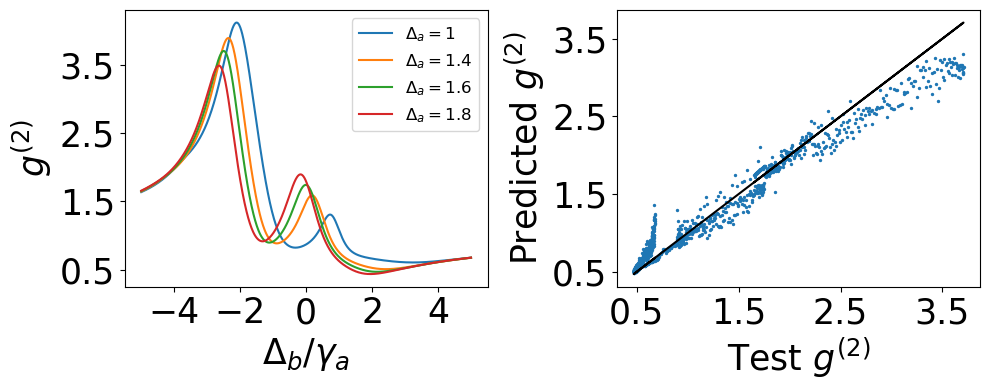

0.037317728482612826

In [52]:
# regressor = RandomForestRegressor(n_estimators=100)
regressor = ExtraTreesRegressor()
regressor.fit(ns, g2)
Y_predict_RFR = regressor.predict(ns_test)
mean_squared_error(g2_test, Y_predict_RFR)

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.013491341690239569

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['g2_a_D2_1_1000'],label='$\Delta_{a} = 1$')
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['g2_a_D2_14_1000'],label='$\Delta_{a} = 1.4$')
C:\Users\kodo0\AppData\Local\Temp\ipykernel_19512\1639462643.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(Deltas[0],mat['

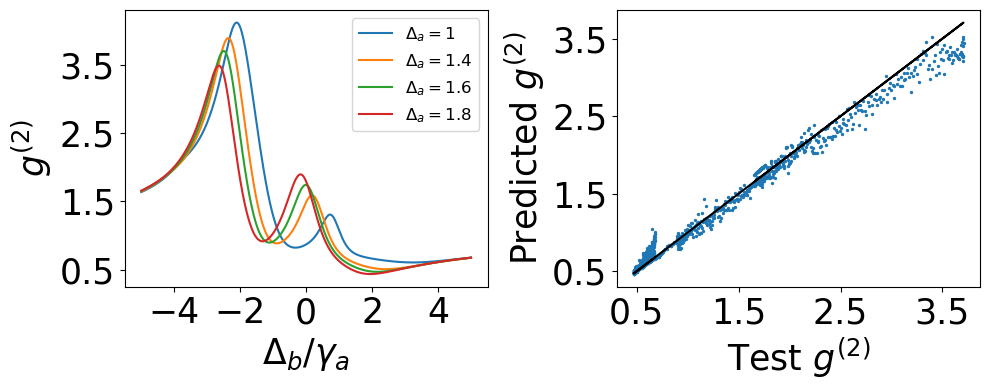

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Deltas[0],mat['g2_a_D2_1_1000'],label='$\Delta_{a} = 1$')
plt.plot(Deltas[0],mat['g2_a_D2_14_1000'],label='$\Delta_{a} = 1.4$')
plt.plot(Deltas[0],mat['g2_a_D2_16_1000'],label='$\Delta_{a} = 1.6$')
plt.plot(Deltas[0],mat['g2_a_D2_18_1000'],label='$\Delta_{a} = 1.8$')
plt.xticks(fontsize=25)
plt.yticks([0.5,1.5,2.5,3.5],fontsize=25)
plt.xlabel('$\Delta_{b}/\gamma_a$',fontsize=25)
plt.ylabel('$g^{(2)}$',fontsize=25)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.scatter(g2_test, Y_predict_RFR,s=2)
plt.plot(g2_test,g2_test,'k')
plt.xticks([0.5,1.5,2.5,3.5],fontsize=25)
plt.yticks([0.5,1.5,2.5,3.5],fontsize=25)
plt.xlabel('Test $g^{(2)}$',fontsize=25)
plt.ylabel('Predicted $g^{(2)}$',fontsize=25)
plt.tight_layout()

In [ ]:
plt.scatter(Y_train_r, Y_train_g2)

In [ ]:
g2_re = []
n_s = []
for i in range(np.shape(g2)[1]):
# for i in range(np.shape(n1)[1]):
    # input = np.reshape(ns[0][i],len(ns[0][0][0]))
    # input = input/sum(input)
    n_s.append(ns[0][i][0])
    g2_re.append({abs(g2[0][i]):Delta[0][i]})
    # g2_re.append(abs(g2[0][i]))

In [ ]:
# n_new = []
# for i in range(np.shape(g2)[1]):
#     n_new.append(np.concatenate((n_s[i], n_s[i]**2, n_s[i]**3)))


In [ ]:
plt.plot(n_classic[0])

In [ ]:
# X = np.array(ns,(1000,))
# X = np.array(ns)
# X = np.reshape(ns,(1000,40))
X = np.array(n_s)
Y = np.reshape(g2_re,5000)
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_classic = np.array(n_classic[0])
X_classic = np.reshape(X_classic,(5000,1))
Y_classic = np.reshape(g2_re,5000)
# X, Y = shuffle(X,Y)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_classic, Y_classic, test_size=0.1)

In [ ]:
np.shape(X_classic)

In [ ]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

In [ ]:
Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [ ]:
np.shape(X_train_c)

In [ ]:
X_train_c

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test)

sc_train = regressor.score(X_train, Y_train_g2)
sc_test = regressor.score(X_test, Y_test_g2)
print([sc_train, sc_test])


regressor_classic = RandomForestRegressor()
regressor_classic.fit(abs(X_train_c), Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(abs(X_test_c))



In [ ]:
error = mean_squared_error(Y_test_g2,Y_predict_RFR)
print(error)

plt.scatter(Y_test_g2, Y_predict_RFR, alpha=0.7, label="Predicted vs True")

In [ ]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_predict_RFR,marker="+")
plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x")
plt.xlabel('Delta')
plt.ylabel('g2')
# plt.ylim([0,5])
# plt.title('reservoir+ESN')